In [1]:
import numpy as np
import cvxpy as cp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import linprog

data = pd.read_csv("data01.csv")

a: 0.7177723577235772, b: 2.334570731707317


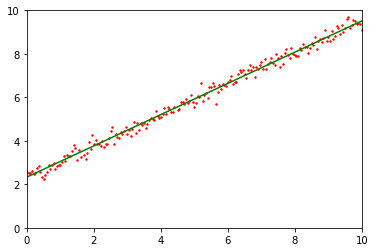

In [2]:
x = data['x']
y = data['y']
n = len(x)  # Number of data points

c = np.concatenate(([0, 0], np.ones(n)))  # Coefficients for a, b are 0, and 1 for each e_i

# Inequality constraints matrix
A_ub = np.vstack([np.column_stack([x, np.ones(n), -np.eye(n)]), 
                  np.column_stack([-x, -np.ones(n), -np.eye(n)])])

# Inequality constraints vector
b_ub = np.concatenate([y, -y])

# Bounds for each variable (a, b unrestricted; e_i >= 0)
bounds = [(None, None), (None, None)] + [(0, None) for _ in range(n)]

# Solve the linear programming problem
result_linprog_corrected = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

# Extract the results for a and b
a_LP, b_LP = result_linprog_corrected.x[:2]

# Display the results
print(f"a: {a_LP}, b: {b_LP}")

plt.scatter(data['x'], data['y'], 2, color='red')
plt.plot(data['x'], data['x'] * a_LP + b_LP, 1, color='green')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()